<a href="https://colab.research.google.com/github/banunkers/d7041e-labs/blob/master/d7041e_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1


In [0]:
import numpy as np
from matplotlib import pyplot as plt
import cv2, glob
from google.colab import drive
import seaborn as sns

In [0]:
drive.mount('/content/drive')

DATA_PATH = '/content/drive/My Drive/D7041E - Applied AI/lab1/part1/dataset'
DATA_CATEGORIES = ["cats", "tigers", "platys", "dogs", "bears"]
x_dataset = []
l_dataset = []

for category in DATA_CATEGORIES:
    files = glob.glob(f'{DATA_PATH}/{category}/*.jpg')
    for file_ in files:
       image = cv2.imread(file_)[..., ::-1]
       x_dataset.append(image)
       l_dataset.append(category)

assert np.array(x_dataset).shape[0] == 25 and np.array(l_dataset).shape[0] == 25

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def plot_sample(index):
    sample = x_dataset[index]
    label = l_dataset[index]

    # setup plots
    fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,15))
    ax0=plt.subplot(2,2,1)
    ax1=plt.subplot(2,2,2)

    # plot sample image
    ax0.set_title(f'Label is {label}')
    ax0.grid(False)
    ax0.imshow(sample)

    # plot sample rgb distribution
    ax1.set_title("Color distribution")
    sns.distplot(sample.flatten(), ax=ax1)

    # Display info
    print(f'max = {np.amax(sample)}')
    print(f'min = {np.amin(sample)}')
    print(f'mean = {np.mean(sample)}')
    print(f'std = {np.std(sample)}')

    plt.show()
    plt.close()

max = 255
min = 0
mean = 85.50987983539095
std = 49.36225631471264


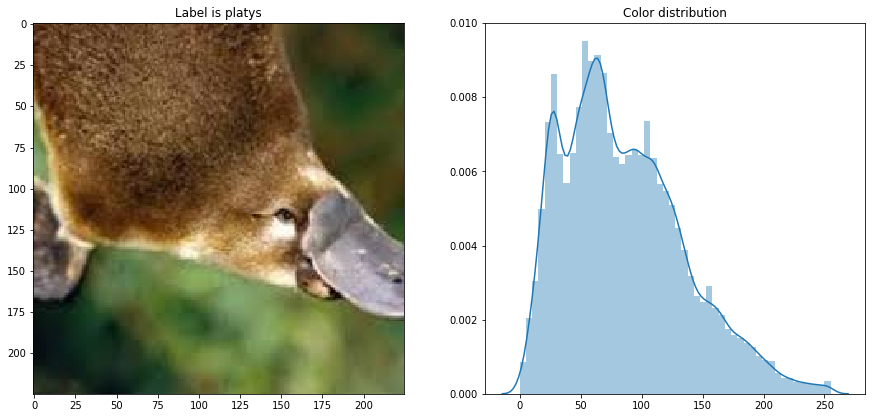

In [0]:
sample = 10
plot_sample(sample)

# Assignment 2

In [0]:
import numpy as np
from matplotlib import pyplot as plt

In [0]:
from keras.datasets import mnist

In [0]:
(Xtr, Ltr), (X_test, L_test)=mnist.load_data()
print(Xtr[0][0][0].dtype)
print(X_test[0][0][0].dtype)
Xtr[0][0].dtype

uint8
uint8


dtype('uint8')

In [0]:
Xtr.shape

(60000, 28, 28)

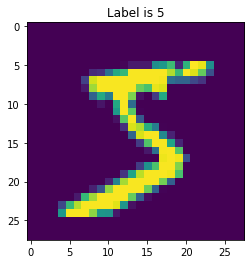

In [0]:
Image=Xtr[0,:,:]
Label=Ltr[0]


plt.title('Label is {Label}'.format(Label=Label))
plt.imshow(Image)

plt.show()
plt.close()


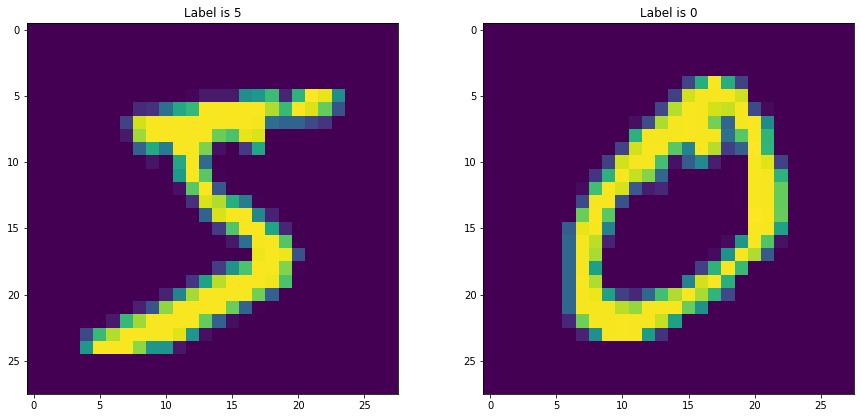

In [0]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,15))
ax0=plt.subplot(2,2,1)
ax1=plt.subplot(2,2,2)

Image=Xtr[0,:,:]
Label=Ltr[0]
Image1=Xtr[1,:,:]
Label1=Ltr[1]


ax0.set_title('Label is {Label}'.format(Label=Label))
ax0.imshow(Image)
ax1.set_title('Label is {Label}'.format(Label=Label1))
ax1.imshow(Image1)


plt.show()
plt.close()


In [0]:
28*28

784

In [0]:
#Traing phase
num_sample=500
Tr_set=Xtr[:num_sample,:,:]
Ltr_set=Ltr[:num_sample]

Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2])

# This fixes the accurracy bug
Tr_set = Tr_set.astype(int)

Tr_set.shape

(500, 784)

In [0]:
def predict(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    
    #training_set = Tr_set.astype(np.int16)
    X = X.astype(int)
    for i in range(num_test):
        # L1 Norm
        #distances=np.sum(np.abs(Tr_set-X[i,:]),axis=1)

        # L2 Norm
        distances=np.sqrt(np.sum(np.square(np.abs(Tr_set-X[i,:])), axis=1))
        #distances = np.linalg.norm(np.abs(Tr_set-X[i,:]))
        
        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

In [0]:
def predict_k_nearest(test_set, training_set, training_label, k_nearest):
    num_test=test_set.shape[0]
    Lpred=np.zeros(num_test, dtype=training_label.dtype)
    test_set = test_set.astype(int)

    for i in range(num_test):
        # L1 Norm
        #distances=np.sum(np.abs(Tr_set-X[i,:]),axis=1)

        # L2 Norm
        distances=np.sqrt(np.sum(np.square(np.abs(training_set-test_set[i,:])), axis=1))

        lpred_voting = np.zeros(10)
        min_index = 0   # used in case of tie
        for j in range(k_nearest):
            min = np.argmin(distances)
            if j == 0:
                min_index = min
            np.put(distances, min, np.inf)
            lpred_voting[training_label[min]] += 1
        
        sorted_votes = np.sort(lpred_voting)
        #print(sorted_votes)
        num_votes = lpred_voting[0]
        tie = False
        for j in range(len(sorted_votes)-2, 0, -1):
            if lpred_voting[j] == sorted_votes[len(sorted_votes) - 1]:
                tie = True

        # if tie choose the label with closest distance
        if tie:
            winner = training_label[min_index]
        else:
            winner = np.argmax(lpred_voting)

        Lpred[i] = winner
    return Lpred

In [0]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
Labels_predicted=predict(Test_images)
k = 3
Labels_predicted_k=predict_k_nearest(Test_images, Tr_set, Ltr_set, k)

print("Accuracy:", np.mean(Labels_predicted==L_test))
print(f'K-Accuracy (k={k}):', np.mean(Labels_predicted_k==L_test))



Accuracy: 0.8294
K-Accuracy (k=3): 0.8216


# Task 2.1
## 1. 1-NN accurracy
1. L1 norm accuracy: 0.2649
2. L2 norm accuracy: 0.19
3. 
    - L1 norm accuracy: 0.811
    - L2 norm accuracy: 0.8294

In [0]:
from sklearn.model_selection import KFold

folds_num_sample = 900
training_set = Xtr[:folds_num_sample,:,:]
training_set_labels = Ltr[:folds_num_sample]
training_set=training_set.reshape(folds_num_sample,training_set.shape[1]*training_set.shape[2]).astype(int)

num_folds = 3
kf = KFold(num_folds, True, 1)
print(kf)
data_folds = kf.split(training_set)
label_folds = kf.split(training_set_labels)

results = np.zeros(10)

for fold, data, labels in zip(range(1, num_folds + 1), data_folds, label_folds):
    (training_fold, validation_fold) = data
    (training_fold_labels, validation_fold_labels) = labels

    for k in range(1, 11):
        labels_predicted = predict_k_nearest(training_set[validation_fold], training_set[training_fold], training_set_labels[training_fold_labels], k)
        accuracy = np.mean(labels_predicted == training_set_labels[validation_fold_labels])
        results[k-1] += accuracy
        print(f'ITERATION: {fold} k={k}: accuracy = {accuracy}')
    print("\n")

best_k = np.argmax(results) + 1
print(f'BEST k VALUE: {best_k}')

KFold(n_splits=3, random_state=1, shuffle=True)
ITERATION: 1 k=1: accuracy = 0.8733333333333333
ITERATION: 1 k=2: accuracy = 0.8733333333333333
ITERATION: 1 k=3: accuracy = 0.8666666666666667
ITERATION: 1 k=4: accuracy = 0.8766666666666667
ITERATION: 1 k=5: accuracy = 0.87
ITERATION: 1 k=6: accuracy = 0.8633333333333333
ITERATION: 1 k=7: accuracy = 0.86
ITERATION: 1 k=8: accuracy = 0.8633333333333333
ITERATION: 1 k=9: accuracy = 0.8566666666666667
ITERATION: 1 k=10: accuracy = 0.85


ITERATION: 2 k=1: accuracy = 0.88
ITERATION: 2 k=2: accuracy = 0.88
ITERATION: 2 k=3: accuracy = 0.8833333333333333
ITERATION: 2 k=4: accuracy = 0.8866666666666667
ITERATION: 2 k=5: accuracy = 0.88
ITERATION: 2 k=6: accuracy = 0.8833333333333333
ITERATION: 2 k=7: accuracy = 0.88
ITERATION: 2 k=8: accuracy = 0.8766666666666667
ITERATION: 2 k=9: accuracy = 0.8766666666666667
ITERATION: 2 k=10: accuracy = 0.8733333333333333


ITERATION: 3 k=1: accuracy = 0.8733333333333333
ITERATION: 3 k=2: accuracy = 0.87333

In [0]:
predicted_test = predict_k_nearest(Test_images, Tr_set, Ltr_set, best_k)
print(f'Classification accuracy on test data with best k = {best_k}: {np.mean(Labels_predicted_k==L_test)}')

Classification accuracy on test data with best k = 4: 0.8216
